In [1]:
import numpy as np
import random
import string
from string import punctuation
from collections import Counter
from itertools import chain, combinations

%matplotlib inline

from timeit import Timer

# Couting numbers in a list

In [2]:
# What is the big-O efficiency class?

def count(haystack, needle):
    c = 0
    for val in haystack:
        if val == needle:
            c += 1
    return c

count([5, 3, 9, 1, 5, 2, 3, 5, 3, 2, 5, 9, 3, 6, 2, 1, 7], 3)

4

# List and Set Operations

big-O class of common list and set operations:

|          | **index** | **append/add** | **delete** | **'in'** | **pop** |
|----------|-------|------------|--------|------|------|
| **list**     | 1     | 1          | n      | n    |   1   |
| **set/dict** | --   | 1          | 1      | 1    |   --  |

# What are the common big-O classes?

In order of best to worst:

$$ O(1)      \\
O(lg(n))     \\
O(n)         \\
O(n lg(n))   \\
O(n^2)       \\
O(n^3)       \\
...          \\
O(2^n)       \\
O(n!)        \\
$$

# A True Story

One student once wrote code like this (I'm just showing pseudocode here). He wanted to read 10,000 images (each of size 320x120) into one large numpy array (of size (10000,38400)) in order to use it as input to train a NN.

```python
all_images = np.array()

for path in paths:
    image = read_flattened_image(path)   # <-- returns a numpy vector of size (38400,)
    all_images = np.vstack((all_images, image))
```

He found that this code was taking a long time to run. As in, he waited several hours and it didn't finish. Why?

Because this algorithm is in O(n^2), where n is the number of images.

Let's rewrite the algorithm like this:

```python
all_images = []

for path in paths:
    image = read_flattened_image(path)   # <-- returns a numpy vector of size (38400,)
    all_images.append(image)

all_images = np.array(all_images)
```

He ran the code above and it took only 5 minutes. Why?

Because this new algorithm is in O(n), where n is the number of images.

That's why this Big-O concept matters even for data scientist. If you aren't aware of your runtime efficiency class, you will not know how to answer these questions:
1. Why is my algorithm taking longer to run than I'd expect?
2. How can I make my algorithm run faster?

Now we'll practice making code run faster.

# Pair Subset Sums (non-negative values only!)

In [3]:
values = [random.randrange(0,100) for i in xrange(4000)]

In [4]:
# What is the big-O efficiency class?

def pair_subset_sum_v1(values, target):

    for i, a in enumerate(values):

        for j, b in enumerate(values):

            if i != j and a + b == target:
                return a, b

    return None

%time ans = pair_subset_sum_v1(values, -1)   # try 100
print ans

CPU times: user 4.45 s, sys: 47.4 ms, total: 4.49 s
Wall time: 4.46 s
None


In [5]:
# What is the big-O efficiency class?

def pair_subset_sum_v2(values, target):

    for i, a in enumerate(values):

        for b in values[i+1:]:

            if a + b == target:
                return a, b

    return None

%time ans = pair_subset_sum_v2(values, -1)   # try 100
print ans

CPU times: user 1.31 s, sys: 24.9 ms, total: 1.34 s
Wall time: 1.32 s
None


In [6]:
# What is the big-O efficiency class?

def pair_subset_sum_v3(values, target):
    
    value_counts = Counter(values)
    
    for val in values:
        
        diff = target - val
        
        if diff in value_counts:
            
            if diff != val:
                return val, diff
            
            elif value_counts[diff] >= 2:
                return val, diff

    return None

%time ans = pair_subset_sum_v3(values, -1)   # try 100
print ans

CPU times: user 3.51 ms, sys: 1.13 ms, total: 4.64 ms
Wall time: 3.66 ms
None


In [7]:
def build_input(n):
    # This input will never have a 'True' result. This will force worst-case runtimes.
    return [random.randrange(1,100) for i in xrange(n)]

def get_times(samples, func):
    t = Timer(lambda: func(samples, -1))
    return t.timeit(number=10)

sizes_slow = range(10, 4000, 200)
times_slow = [get_times(build_input(n), pair_subset_sum_v2) for n in sizes_slow]

sizes_fast = range(10, 10000, 1000)
times_fast = [get_times(build_input(n), pair_subset_sum_v3) for n in sizes_fast]

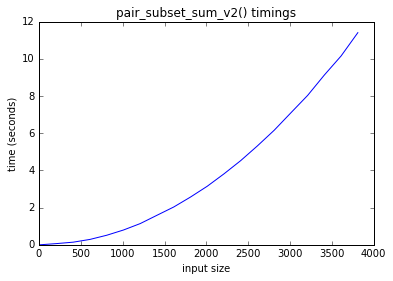

In [8]:
plt.plot(sizes_slow, times_slow)
plt.title("pair_subset_sum_v2() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

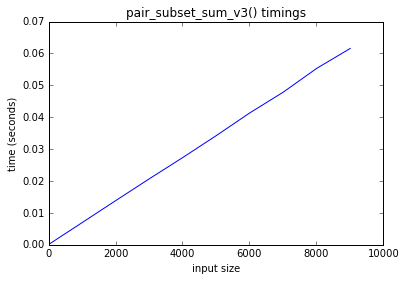

In [9]:
plt.plot(sizes_fast, times_fast)
plt.title("pair_subset_sum_v3() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

# Subset Sums (non-negative values only!)

In [10]:
# From: https://docs.python.org/2/library/itertools.html

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [11]:
values = [random.randrange(0,100) for i in xrange(23)]

In [12]:
# What is the big-O efficiency class?

def subset_sum_v1(values, target):

    for subset in powerset(values):

        if sum(subset) == target:
            return subset

    return None

%time ans = subset_sum_v1(values, 100000000)    # notice the change by increasing the input size by 1
print ans, sum(ans) if ans is not None else 0

CPU times: user 3.38 s, sys: 42.5 ms, total: 3.42 s
Wall time: 3.39 s
None 0


In [13]:
# What is the big-O efficiency class?

def subset_sum_v2(values, target):
    
    possible = {}
    possible[0] = []   # using no values (the empty list) gives a sum of 0

    for val in values:

        for p, l in possible.copy().iteritems():

            new_p = p + val

            if new_p < target:
                possible[new_p] = l + [val]

            if new_p == target:
                return l + [val]

    return None

%time ans = subset_sum_v2(values, 100000000)    # notice the change by increasing the input size by 1
print ans, sum(ans) if ans is not None else 0

CPU times: user 9.67 ms, sys: 2.55 ms, total: 12.2 ms
Wall time: 10.1 ms
None 0


In [14]:
def build_input(n):
    # This input will never have a 'True' result. This will force worst-case runtimes.
    return [random.randrange(1,100) for i in xrange(n)]

def get_times(samples, func):
    t = Timer(lambda: func(samples, 100000000))
    return t.timeit(number=10)

sizes_slow = range(2, 23, 1)
times_slow = [get_times(build_input(n), subset_sum_v1) for n in sizes_slow]

sizes_fast = range(10, 100, 5)
times_fast = [get_times(build_input(n), subset_sum_v2) for n in sizes_fast]

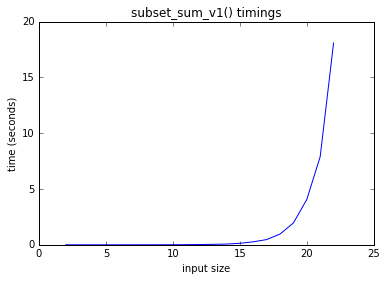

In [15]:
plt.plot(sizes_slow, times_slow)
plt.title("subset_sum_v1() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

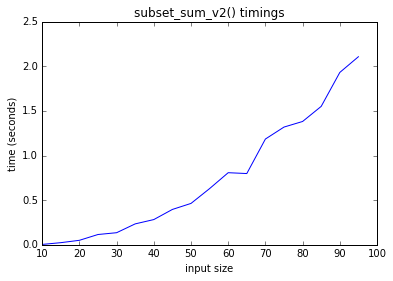

In [16]:
plt.plot(sizes_fast, times_fast)
plt.title("subset_sum_v2() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

# Effeciency: invalid_words()

In [17]:
with open('data/frankenstein_small.txt') as f:
    doc_lines = f.readlines()

with open('data/wordlist.txt') as f:
    valid_words = [line.lower().strip() for line in f]

In [18]:
# What is the big-O efficiency class?

def invalid_words(valid_words, doc_lines):
    '''
    INPUT: list, str
    OUTPUT: int

    Given a list of all the valid words and a document filename, return a list
    of words from the document that are not valid words.
    '''
    result = []
    for line in doc_lines:
        words = line.strip().split()
        for word in words:
            if word.lower().strip(punctuation) not in valid_words:
                result.append(word)
    return result

%time invalid = invalid_words(valid_words, doc_lines)

CPU times: user 4.45 s, sys: 13.2 ms, total: 4.47 s
Wall time: 4.47 s


In [19]:
# What is the big-O efficiency class?

def invalid_words_faster(valid_words, doc_lines):
    '''
    INPUT: list, str
    OUTPUT: int

    Given a list of all the valid words and a document filename, return a list
    of words from the document that are not valid words.
    '''
    valid_words_set = set(valid_words)
    result = []
    for line in doc_lines:
        words = line.strip().split()
        for word in words:
            if word.lower().strip(punctuation) not in valid_words_set:
                result.append(word)
    return result

%time invalid = invalid_words_faster(valid_words, doc_lines)

CPU times: user 30.6 ms, sys: 4.46 ms, total: 35.1 ms
Wall time: 33.8 ms


# Sorting!

In [20]:
'''
Note:
DON'T EVER IMPLEMENT YOUR OWN SORTING FUNCTION! These impls are just for big-O
learning purposes. For that reason they implement things ground-up.
'''

def selection_sort(values):
    
    for i in xrange(len(values)):
        
        min_index = i
        
        for j in xrange(i+1, len(values)):
            
            if values[j] < values[min_index]:
                min_index = j
        
        values[i], values[min_index] = values[min_index], values[i]  # <-- swap i with min_index

    return values

selection_sort([4, 12, 6, 3, 2, 8, 2, 0, 1])

[0, 1, 2, 2, 3, 4, 6, 8, 12]

In [21]:
def merge(a, b):
    '''
    Merge two pre-sorted lists: a and b.
    Return a merged (still sorted) lists.
    '''
    
    i, j = 0, 0
    
    res = []
    
    while i < len(a) and j < len(b):
        
        if a[i] < b[j]:
            res.append(a[i])
            i += 1
        else:
            res.append(b[j])
            j += 1
            
    while i < len(a):
        res.append(a[i])
        i += 1

    while j < len(b):
        res.append(b[j])
        j += 1
        
    return res


merge([1, 4, 7, 9, 12], [5, 8, 9, 9, 10, 30])

[1, 4, 5, 7, 8, 9, 9, 9, 10, 12, 30]

In [22]:
def merge_sort(values):
    
    if len(values) <= 1:
        return values

    mid_index = len(values) / 2
    
    left_sorted_values = merge_sort(values[:mid_index])
    right_sorted_values = merge_sort(values[mid_index:])
    
    return merge(left_sorted_values, right_sorted_values)

merge_sort([4, 12, 6, 3, 2, 8, 2, 0, 1])

[0, 1, 2, 2, 3, 4, 6, 8, 12]

In [23]:
def build_input(n):
    return [random.randrange(1,10000) for i in xrange(n)]

def get_times(samples, func):
    t = Timer(lambda: func(samples))
    return t.timeit(number=10)

sizes_slow = range(10, 2000, 100)
times_slow = [get_times(build_input(n), selection_sort) for n in sizes_slow]

sizes_fast = range(10, 10000, 1000)
times_fast = [get_times(build_input(n), merge_sort) for n in sizes_fast]

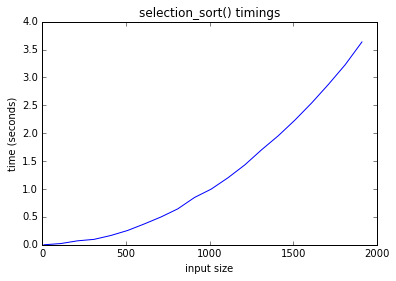

In [24]:
plt.plot(sizes_slow, times_slow)
plt.title("selection_sort() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

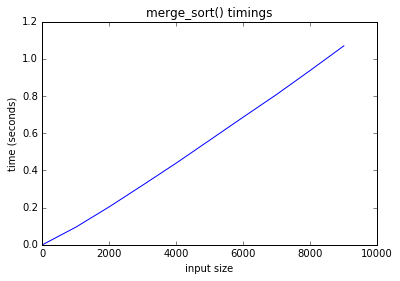

In [25]:
plt.plot(sizes_fast, times_fast)
plt.title("merge_sort() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")